# Data Wrangling Project
## Table of Contents

1. <a href="#intro">Introduction</a>
2. <a href="#wrangling">Data Wrangling:</a>
    * <a href="#gather">Gather</a>
    * <a href="#assess">Assess</a>
    * <a href="#clean">Clean</a>
    
    
3. <a href="#dav">Data Analysis and Visualization</a>
4. <a href="#conclusions">Conclusions</a>
</ul>

<a id='intro'></a>
## Introduction

The goal of the project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

The data that will be used for this project:
- **Enhanced Twitter Archive** of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for their students to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. 
- **Image Predictions File**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This data should be downloaded programmatically using the Requests library.
- **Additional Data via the Twitter API**. In Twitter archives retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
from timeit import default_timer as timer
import os
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

<a id='gather'></a>
## Gather
### Enhanced Twitter Archive

In [2]:
# Read twitter archive into a dataframe
df1 = pd.read_csv('twitter-archive-enhanced.csv')

### Image Predictions File

In [3]:
# Download file programmatically using the Requests library and the following URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)
        
# Check if "image-predictions.tsv" was downloaded into the current folder
os.listdir()

['.ipynb_checkpoints',
 'act_report.html',
 'act_report.ipynb',
 'image-predictions.tsv',
 'tweet_json.txt',
 'twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'visuals',
 'wrangle_act-Copy1.ipynb',
 'wrangle_act.ipynb',
 'wrangle_act.zip',
 'wrangle_report.html',
 'wrangle_report.ipynb']

In [5]:
# Read '.tsv' file into a dataframe, specifying delimiter
df2 = pd.read_csv('image-predictions.tsv', delimiter='\t')

### Additional Data via the Twitter API

In [6]:
# Create an API object to gather Twitter data
consumer_key = 'KEY_HIDDEN'
consumer_secret = 'KEY_HIDDEN'
access_token = 'KEY_HIDDEN'
access_secret = 'KEY_HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [7]:
# Get the Tweet IDs
tweet_ids = df1.tweet_id.values
len(tweet_ids)

2356

In [8]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run 
    for tweet_id in tweet_ids:
        count += 1
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            fails_dict[tweet_id] = e
            pass
        
end = timer()
print(end - start)
print(fails_dict)

Rate limit reached. Sleeping for: 254
Rate limit reached. Sleeping for: 504
Rate limit reached. Sleeping for: 507


2373.8627341
{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 856602993587888130: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 851953902622658560: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 845459076796616705: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 844704788403113984: TweepError([{'code': 144, 'message':

In [9]:
# Check how many errors occurred
len(fails_dict)

28

In [10]:
# Import data from Twitter Query
tweet_list = []

with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        tweet_list.append({'id': json_data['id'],
                                'favorite_count': json_data['favorite_count'],
                                'retweet_count': json_data['retweet_count']})

In [11]:
# Create a new dataframe
df3 = pd.DataFrame(tweet_list, columns = ['id', 'retweet_count', 'favorite_count'])
df3 = df3.sort_values('id').reset_index(drop=True)

<a id='assess'></a>
## Assess

In [12]:
# Visual assessment of the first dataframe
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Quality Issues
- Missing values in some columns (in_reply_to_status_id, in_reply_to_user_id,  retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)
- Erroneous datatypes (timestamp, retweeted_status_timestamp)

In [14]:
df1[['tweet_id', 'expanded_urls']].head()

,tweet_id,expanded_urls
0,892420643555336193,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,https://twitter.com/dog_rates/status/891327558...


In [15]:
df1['expanded_urls'][0]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [16]:
df1['expanded_urls'][165]

'https://twitter.com/dog_rates/status/761672994376806400/video/1'

In [17]:
df1[df1['expanded_urls'].isnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


##### Note
After some examination, I noticed that the tweets with missing expanded urls can be accessed through the link 'https://twitter.com/dog_rates/status/#tweet_id' (changing #tweet_id for corresponding id) but they do not have photos nor videos, they are actually just replies for other people's dogs tweets.

#### Quality Issue
- Unnecessary rows with replies to other people's tweets

In [18]:
# Check for retweets
df1[df1['retweeted_status_id'].notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [19]:
df1[df1['retweeted_status_id'].notnull()].shape[0]

181

#### Quality Issue
- 181 rows containing retweets (not original ratings)

In [20]:
# Check for duplicated rows
len(df1[df1.duplicated()])

0

In [21]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [22]:
# Check for suspicious ratings
df1[(df1['rating_numerator'] > 20) & (df1['rating_denominator'] > 10)].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None


In [23]:
df1[(df1['rating_numerator'] < 20) & (df1['rating_denominator'] > 10)].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4,20,None,None,None,None,None


#### Quality Issue
- Unexpected values in rating numerators and deminators

#### Tidiness Issue
- Rating numerators and denominators should be one variable

In [24]:
df1[df1['rating_numerator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


#### Quality Issue
- Tweet with ID `835152434251116546` rated 0/10 for plagiarism

In [25]:
# Check for errors in names
df1['name'].value_counts()[:20]

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
the          8
Sadie        8
Bailey       7
Daisy        7
an           7
Buddy        7
Toby         7
Jack         6
Koda         6
Name: name, dtype: int64

In [26]:
df1[df1['name'] == 'a'].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None


In [27]:
df1['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [28]:
df1['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

#### Quality Issues
- Missing data (as None) in most rows of dog stages and dog names
- Erroneous dog names (a, an, the) where a dog name is absent in a tweet

#### Tidiness Issue
- Dog stages (doggo, floofer, pupper, puppo) in 4 columns instead of 1

In [29]:
# Visual assessment of the second dataframe
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### Quality Issues
- Inconsistency in breed names (some lowercase, some capitalized)

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
# Check for duplicates 
len(df2[df2.duplicated()])

0

No missing values, no duplicates, correct data types.

In [32]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


No visible problems in numerical columns.

In [33]:
# Visual assessment of the last dataframe
df3

,id,retweet_count,favorite_count
0,666020888022790149,456,2381
1,666029285002620928,41,120
2,666033412701032449,39,111
3,666044226329800704,126,266
4,666049248165822465,40,96
...,...,...,...
2323,891327558926688256,8332,37261
2324,891689557279858688,7730,39003
2325,891815181378084864,3705,23207
2326,892177421306343426,5594,30873


In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2328 non-null   int64
 1   retweet_count   2328 non-null   int64
 2   favorite_count  2328 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [35]:
df3.describe()

,id,retweet_count,favorite_count
count,2.328000e+03,2328.000000,2328.000000
mean,7.419275e+17,2655.221649,7460.358247
std,6.823647e+16,4491.413447,11587.012254
min,6.660209e+17,1.000000,0.000000
25%,6.782728e+17,537.500000,1296.750000
50%,7.183508e+17,1242.500000,3243.500000
75%,7.986673e+17,3080.500000,9134.750000
max,8.924206e+17,76282.000000,153958.000000


In [36]:
# Check for duplicates
len(df3[df3.duplicated()])

0

#### Tidiness Issues
- Inconsistency in a column name (tweet ID) among tables
- Three dataframes instead of one

<a id='clean'></a>
## Clean

In [37]:
# Create copies of dataframes
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

### Missing Data

**`df1`: Missing values in columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'**

##### Define
Actually, missing values in all of these columns mean that these are original tweets (not replies and not retweets). As we are interested only in original ones, we will drop all 78 replies and 181 retweets. And after that, we will drop these columns, as they will be completely Null.

##### Code 1

In [38]:
df1_clean = df1_clean[df1_clean['in_reply_to_status_id'].isnull()]
df1_clean = df1_clean[df1_clean['retweeted_status_id'].isnull()]

##### Test 1

In [39]:
print('Before cleaning there were', df1.shape[0], 'rows.')
print('Now there are', df1_clean.shape[0], 'rows.')

Before cleaning there were 2356 rows.
Now there are 2097 rows.


In [40]:
# all 5 columns should have 2097 null values
df1_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2097
retweeted_status_user_id      2097
retweeted_status_timestamp    2097
expanded_urls                    3
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

##### Code 2

In [41]:
# Drop the columns
columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df1_clean = df1_clean.drop(columns_to_drop, axis=1)

##### Test 2

In [42]:
df1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

**`df1`: Missing values in 'expanded_urls' column**

##### Define
Missing expanded urls are located in the tweets without photos. We do not need these rows anyway, as we only want tweets that have images. Let's delete them.

##### Code

In [43]:
df1_clean = df1_clean[df1_clean['expanded_urls'].notnull()]

##### Test

In [44]:
df1_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

**`df1`: Missing data in dog stages and names as None**

##### Define
We cannot fill in the missing values in these rows, but let's [replace them with NaN](https://stackoverflow.com/questions/29247712/pandas-how-to-replace-with-nan-handling-non-standard-missing-values) to be consistent among columns. 

##### Code

In [45]:
columns_to_replace = ['name', 'doggo', 'floofer', 'pupper', 'puppo']
df1_clean[columns_to_replace] = df1_clean[columns_to_replace].replace('None', np.NaN)

##### Test

In [46]:
# Now, we can see Null values
df1_clean[columns_to_replace].isnull().sum()

name        600
doggo      2011
floofer    2084
pupper     1865
puppo      2070
dtype: int64

### Tidiness

**`df1`: Dog stages (doggo, floofer, pupper, puppo) in 4 columns instead of 1**

##### Define

Using pandas' [.ffill() method](https://stackoverflow.com/questions/54753077/how-to-use-the-pandas-melt-while-keeping-the-nan-values), turn four variables into one column (dog stage).

##### Code

In [47]:
df1_clean['dog_stage']=df1_clean.loc[:,['doggo', 'floofer', 'pupper', 'puppo']].ffill(axis=1).iloc[:,-1]

# Drop previous dog stage columns
df1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [48]:
df1_clean.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2226,668274247790391296,2015-11-22 03:46:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sophie. Her son just got in the car to le...,https://twitter.com/dog_rates/status/668274247...,10,10,Sophie,NaN
2254,667782464991965184,2015-11-20 19:12:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Super rare dog. Endangered (?). Thinks it's fu...,https://twitter.com/dog_rates/status/667782464...,9,10,NaN,NaN
1451,695794761660297217,2016-02-06 02:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. His throne is modeled after him...,https://twitter.com/dog_rates/status/695794761...,13,10,Wyatt,NaN
495,813172488309972993,2016-12-26 00:00:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eleanor. She winks like she knows many...,https://twitter.com/dog_rates/status/813172488...,12,10,Eleanor,NaN
2181,668994913074286592,2015-11-24 03:29:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous pups here. Both have cute fake ho...,https://twitter.com/dog_rates/status/668994913...,5,10,NaN,NaN
1514,691090071332753408,2016-01-24 02:48:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's a dog in a mailbox. 12/1...,https://twitter.com/dog_rates/status/691090071...,12,10,NaN,NaN
712,784431430411685888,2016-10-07 16:33:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stormy. He's curly af. Already pupared...,https://twitter.com/dog_rates/status/784431430...,12,10,Stormy,NaN
2332,666345417576210432,2015-11-16 20:01:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,https://twitter.com/dog_rates/status/666345417...,10,10,NaN,NaN
579,800513324630806528,2016-11-21 01:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chef. Chef loves everyone and wants ev...,https://twitter.com/dog_rates/status/800513324...,11,10,Chef,NaN
1783,677673981332312066,2015-12-18 02:17:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Endangered triangular pup here. Could be a wiz...,https://twitter.com/dog_rates/status/677673981...,9,10,NaN,NaN


In [49]:
df1_clean['dog_stage'].value_counts()

pupper     229
doggo       72
puppo       24
floofer     10
Name: dog_stage, dtype: int64

**Inconsistency in a column name (tweet ID) among tables**

##### Define
Rename a column name 'id' to 'tweet_id' in `df3`.

##### Code

In [50]:
df3_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

##### Test

In [51]:
df3_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

**Three dataframes instead of one**

##### Define
Merge all dataframes into one (df_clean) on tweet id column. As we are interested in records that have all the information (including favorite and retweet counts, dog breeds info), we won't specify how to merge. That will result in slightly less rows but at the same time less null values.

##### Code

In [52]:
df_clean = pd.merge(df1_clean, df3_clean, on=['tweet_id'])
df_clean = pd.merge(df_clean, df2_clean, on=['tweet_id'])

##### Test

In [53]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 1960
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1961 non-null   int64  
 1   timestamp           1961 non-null   object 
 2   source              1961 non-null   object 
 3   text                1961 non-null   object 
 4   expanded_urls       1961 non-null   object 
 5   rating_numerator    1961 non-null   int64  
 6   rating_denominator  1961 non-null   int64  
 7   name                1438 non-null   object 
 8   dog_stage           301 non-null    object 
 9   retweet_count       1961 non-null   int64  
 10  favorite_count      1961 non-null   int64  
 11  jpg_url             1961 non-null   object 
 12  img_num             1961 non-null   int64  
 13  p1                  1961 non-null   object 
 14  p1_conf             1961 non-null   float64
 15  p1_dog              1961 non-null   bool   
 16  p2    

### Quality

**Erroneous datatypes (timestamp, retweeted_status_timestamp)**

##### Define
Convert datatypes of the column timestamp (retweeted_status_timestamp was dropped earlier) to datetime, using pandas .to_datetime() method.

##### Code

In [54]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

##### Test

In [55]:
df_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
dog_stage                          object
retweet_count                       int64
favorite_count                      int64
jpg_url                            object
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                 object
p3_conf                           float64
p3_dog                               bool
dtype: object

**Unnecessary rows with replies to other people's tweets and with retweets (not original ratings)**

This problem has been already fixed while cleaning missing data.

**Tweet with ID '835152434251116546' rated 0/10 for plagiarism**

##### Define
Remove that observation.

##### Code

In [56]:
df_clean[df_clean['rating_numerator'] == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
229,835152434251116546,2017-02-24 15:40:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,NaN,NaN,2955,...,3,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True


In [57]:
df_clean = df_clean[df_clean['rating_numerator'] != 0]

##### Test

In [58]:
df_clean[df_clean['tweet_id'] == 835152434251116546]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**Erroneous dog names (a, an, the) where a dog name is absent in a tweet**

##### Define
Find and select all erroneous dog names and then replace them with NaN.

##### Code

In [59]:
# List of all names
np.unique(df_clean['name'].tolist())

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Banditt', 'Banjo', 'Barclay', 'Barney',
       'Baron', 'Batdog', 'Bauer', 'Baxter', 'Bayley', 'BeBe', 'Bear',
       'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell', 'Bella', 'Belle',
       'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley', 'Berb', 'Berkeley',
       'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya', 'Biden', 'Bilbo',
       'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick', 'Blakely',
       'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu', 'Blue',
       'Bluebert', 

In [60]:
# Make a list of records that are not names (in the end of a name list above)
not_a_name_list = ['a', 'actually', 'all', 'an', 'by', 'getting', 'his',
       'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my',
       'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the',
       'this', 'unacceptable', 'very']

# Replace with Null values
for word in not_a_name_list:
    df_clean.name.replace(word, np.nan, inplace=True)

##### Test

In [61]:
df_clean['name'].value_counts()

Charlie    10
Oliver     10
Lucy        9
Penny       9
Tucker      9
           ..
Beya        1
Gòrdón      1
Ron         1
Lucia       1
Sailor      1
Name: name, Length: 909, dtype: int64

In [62]:
df_clean['name'].isnull().sum()

620

**Inconsistency in breed names (some lowercase, some capitalized)**

##### Define
Make all dog breeds lowercase.

##### Code

In [63]:
breed_cols = ['p1', 'p2', 'p3']
for col in breed_cols:
    df_clean.loc[:, col] = df_clean.loc[:, col].str.lower()

##### Test

In [64]:
df_clean[breed_cols].sample(5)

,p1,p2,p3
812,cup,toy_poodle,consomme
251,pembroke,cardigan,appenzeller
976,hotdog,rottweiler,labrador_retriever
1582,ski_mask,chihuahua,kelpie
1239,labrador_retriever,chesapeake_bay_retriever,german_short-haired_pointer


**Unexpected values in rating numerators and deminators**

##### Define
One of the reasons is just existance of unusual ratings (e.i. 84/70) which are completely valid.
But some of them were created out of mistake. When another fraction was mentioned before an actual rating, it was copied to the ratings.

To deal with this, we will do the following:
- find all rows with more than one fraction in the text that have suspicious ratings (numerator less than 10 or more than 20 or denominator different than 10)
- find wrong ratings based on the text
- replace those rating numerators and demoninators with correct numbers

##### Code

In [65]:
# Create patterns and a mask
pattern = r"\d+/\d+.*\d+/\d+"
capture_pattern = r"\d+/\d+.*(\b[0-9]+)/(\d+)"
suspicious_ratings = (df_clean['rating_numerator'] > 20) | (df_clean['rating_numerator'] < 10) | (df_clean['rating_denominator'] != 10)

In [66]:
# To see the whole text
pd.set_option('display.max_colwidth', 200)

rows_to_fix = df_clean[df_clean['text'].str.contains(pattern) & suspicious_ratings]
rows_to_fix[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
787,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
877,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
911,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1045,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9,10
1133,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4,10
1171,691483041324204033,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,5,10
1305,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11
1520,674646392044941312,Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD,5,10
1585,673295268553605120,Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg,8,10
1825,668537837512433665,This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10 https://t.co/stEodX9Aba,8,10


In [67]:
# Extract second fraction in the rows above
rows_to_fix['text'].str.extract(capture_pattern)

,0,1
787,14,10
877,13,10
911,11,10
1045,2,10
1133,13,10
1171,10,10
1305,10,10
1520,8,10
1585,11,10
1825,1,10


In [68]:
# Replace wrong values with correct numbers
fraction_cols = ['rating_numerator','rating_denominator']
df_clean.loc[787, fraction_cols] = [14,10]
df_clean.loc[877, fraction_cols] = [13,10]
df_clean.loc[911, fraction_cols] = [11,10]
df_clean.loc[1134, fraction_cols] = [13,10]
df_clean.loc[1172, fraction_cols] = [10,10]
df_clean.loc[1306, fraction_cols] = [10,10]
df_clean.loc[1941, fraction_cols] = [9,10]

##### Test

In [69]:
df_clean[df_clean['text'].str.contains(pattern) & suspicious_ratings][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
787,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10
877,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13,10
911,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11,10
1045,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9,10
1133,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4,10
1171,691483041324204033,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,5,10
1305,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11
1520,674646392044941312,Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD,5,10
1585,673295268553605120,Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg,8,10
1825,668537837512433665,This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10 https://t.co/stEodX9Aba,8,10


### Tidiness


**Rating numerators and denominators should be one variable**

##### Define
- Divide numerators by denominators and save results into a new column (rating)
- Drop old rating columns
- Drop rows with more than 2.0 rating (outliers)

It will make analysis cleaner and normalize ratings like '84/70'.

In [70]:
df_clean['rating'] = df_clean['rating_numerator'] / df_clean['rating_denominator']
df_clean = df_clean.drop(['rating_numerator', 'rating_denominator'], axis=1)
df_clean = df_clean[df_clean['rating'] < 2]

##### Test

In [71]:
df_clean['rating'].value_counts()

1.200000    446
1.000000    419
1.100000    396
1.300000    250
0.900000    151
0.800000     95
0.700000     50
1.400000     34
0.500000     34
0.600000     31
0.300000     19
0.400000     15
0.200000      9
0.100000      4
0.636364      1
Name: rating, dtype: int64

### Assess the dataframe one more time for the final cleaning

In [72]:
# To show all columns
pd.set_option('display.max_columns', 21)
df_clean

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,7549,35711,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,5594,30873,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,3705,23207,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,NaN,7730,39003,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,NaN,8332,37261,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,NaN,NaN,40,96,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,0.5
1957,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,NaN,NaN,126,266,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,0.6
1958,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https:/

#### Quality Issue
- Some dogs were not recognized (e.i. index 0: orange, bagel, banana)

#### Tidiness Issue
- 3 predictions should be narrowed to the most possible one

**`p1-p3_dog`: Some dogs were not recognized (e.i. index 0: orange, bagel, banana)**

##### Define
Remove rows that have three Falses in columns p1_dog, p2_dog, p3_dog.

##### Code

In [73]:
# Count in how many rows dogs were not recogized
len(df_clean[(df_clean.p1_dog == False) & (df_clean.p1_dog == False) & (df_clean.p1_dog == False)])

505

In [74]:
df_clean = df_clean[(df_clean.p1_dog == True) | (df_clean.p1_dog == True) | (df_clean.p1_dog == True)]

##### Test

In [75]:
# In how many rows dogs are not recognized after cleaning
len(df_clean[(df_clean.p1_dog == False) & (df_clean.p1_dog == False) & (df_clean.p1_dog == False)])

0

**`p1-p3_dog`: 3 predictions should be narrowed to the most possible one**

##### Define
Create a new column for the most likely dog breed prediction, defining a new function breed_prediction() and using [pandas apply function](https://www.w3resource.com/pandas/dataframe/dataframe-apply.php#:~:text=DataFrame%20%2D%20apply()%20function,columns%20(axis%3D1).) to apply the function to each row of the dataframe. Drop all 9 columns from p1 to p3_dog.

##### Code

In [76]:
def breed_prediction(df):
    if df['p1_dog']:
        return df['p1']
    elif df['p2_dog']:
        return df['p2']
    else:
        return df['p3']

df_clean['breed_prediction'] = df_clean.apply(breed_prediction, axis=1)
df_clean = df_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 
                         axis=1)

C:\Users\annab\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


##### Test

In [77]:
df_clean['breed_prediction']

1                      chihuahua
2                      chihuahua
4                         basset
5       chesapeake_bay_retriever
6                    appenzeller
                  ...           
1956          miniature_pinscher
1957         rhodesian_ridgeback
1958             german_shepherd
1959                     redbone
1960      welsh_springer_spaniel
Name: breed_prediction, Length: 1449, dtype: object

In [78]:
df_clean

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,rating,breed_prediction
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,5594,30873,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1.3,chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,3705,23207,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1.2,chihuahua
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,NaN,8332,37261,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1.2,basset
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,NaN,NaN,2794,18782,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,1.3,chesapeake_bay_retriever
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,NaN,1814,10912,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,1.3,appenzeller
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,NaN,NaN,40,96,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,0.5,miniature_pinscher
1957,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,NaN,NaN,126,266,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,0.6,rhodesian_ridgeback
1958,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,NaN,NaN,39,111,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,0.9,german_shepherd
1959,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about

### Store Final Dataframe

In [79]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='dav'></a>
## Data Analysis and Visualization

### Which dog breeds are favorite by Twitter users?

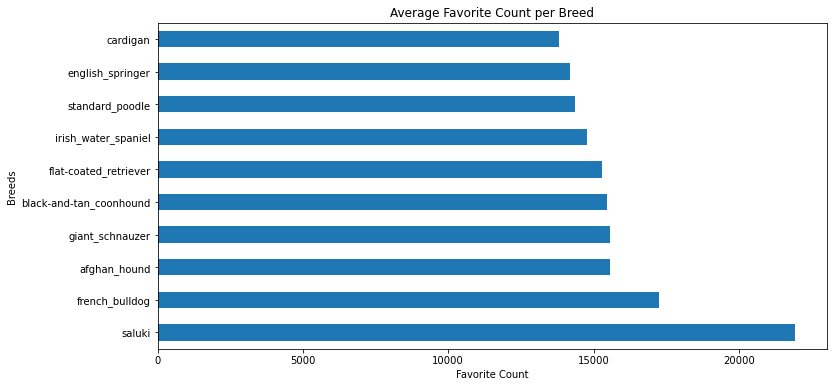

In [83]:
# group by breeds, count average favorite count per breed, sort from highest values to lowest
breed_fav = df_clean.groupby('breed_prediction').favorite_count.mean().sort_values(ascending=False)[:10]
plt.figure(figsize=(12,6))
breed_fav.plot(kind='barh');
plt.title("Average Favorite Count per Breed");
plt.xlabel("Favorite Count");
plt.ylabel("Breeds");

According to the plot above, dog breeds which get the most 'likes' are:
- Saluki
- French Bulldog
- Afghan Hound
- Giant Schnauzer
- Black and Tan Coonhound
- Flat-Coated Retriever
- Irish Water Spaniel

### Which dog breeds are retweeted the most?

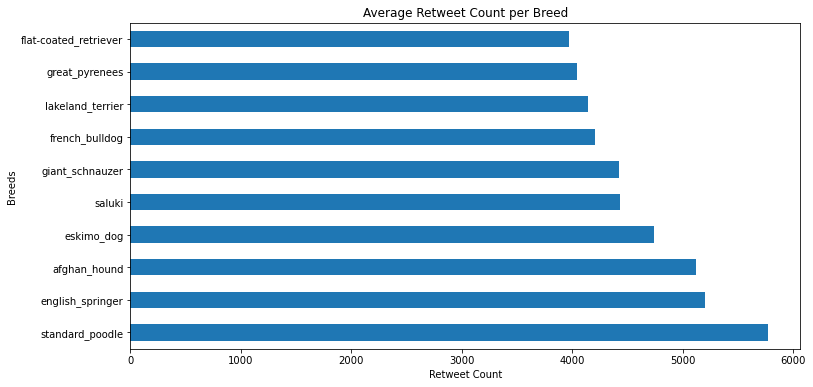

In [84]:
# group by breeds, count average retweet count per breed, sort from highest values to lowest
breed_retweet = df_clean.groupby('breed_prediction').retweet_count.mean().sort_values(ascending=False)[:10]
plt.figure(figsize=(12,6))
breed_retweet.plot(kind='barh')
plt.title("Average Retweet Count per Breed")
plt.xlabel("Retweet Count")
plt.ylabel("Breeds");

As we can see, the most retweeted dog breeds are:
- Standard Poodle
- English Springer
- Afghan Hound
- Eskimo Dog
- Saluki
- Giant Schnauzer
- French Bulldog

The results seem similar to the previous plot. And it's not surprising that users often retweet and like the same tweets. But let's investigate the correlation deeper.

### Correlation between favorite and retweet counts

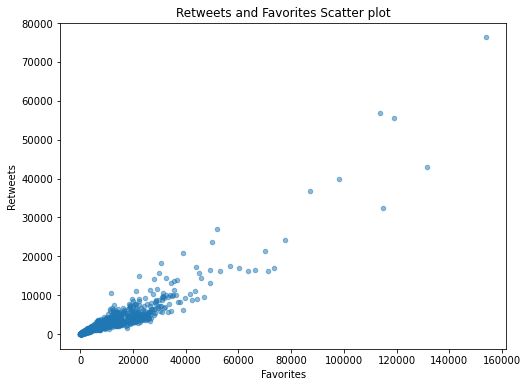

In [86]:
df_clean.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5, figsize=(8,6))
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and Favorites Scatter plot');

As it was predicted, there is a strong positive correlation between favorites and retweets.

### Which dog breeds are rated the highest by 'We Rate Dogs'?

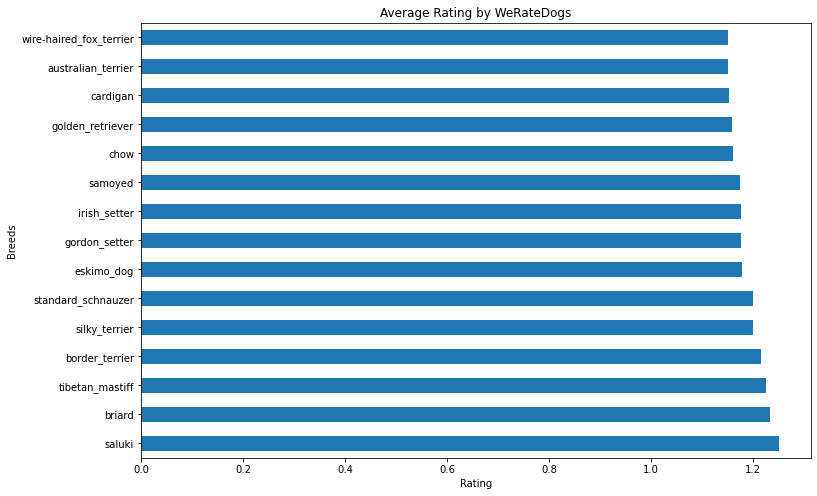

In [87]:
# group by breeds, count average rating per breed, sort from highest values to lowest
breed_rating = df_clean.groupby('breed_prediction').rating.mean().sort_values(ascending=False)[:15]
plt.figure(figsize=(12,8))
breed_rating.plot(kind='barh')
plt.title("Average Rating by WeRateDogs")
plt.xlabel("Rating")
plt.ylabel("Breeds");

According to WeRateDogs, the most adorable and highly rated dog breed are:
- Saluki
- Briard
- Tibetian Mastiff
- Border Terrier
- Silky Terrier
- Standard Schnauzer
- Escimo DOg
- Gordon Setter
- Irish Setter
- Samoyed
- Chow
 
This rating is different compared to Twitter users' opinion, except for the first the most favorite dog Saluki. Let's see correlation, if there is one.

### Corelation between favorite dog breeds by Twitter users and by WeRateDogs

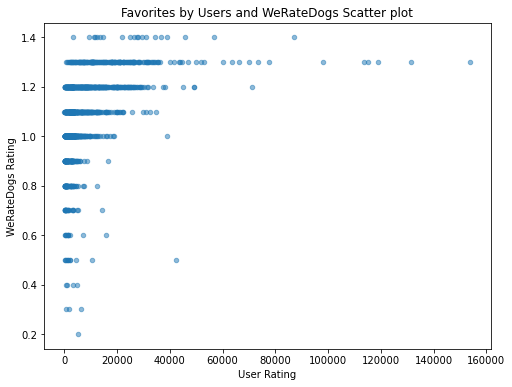

In [88]:
df_clean.plot(kind = 'scatter', x = 'favorite_count', y = 'rating', alpha = 0.5, figsize=(8,6))
plt.xlabel('User Rating')
plt.ylabel('WeRateDogs Rating')
plt.title('Favorites by Users and WeRateDogs Scatter plot');

There is a correlation between favorites by users and WeRateDogs but it's not as strong as the one between favorites and retwets by users.

### What are the most popular dog names?

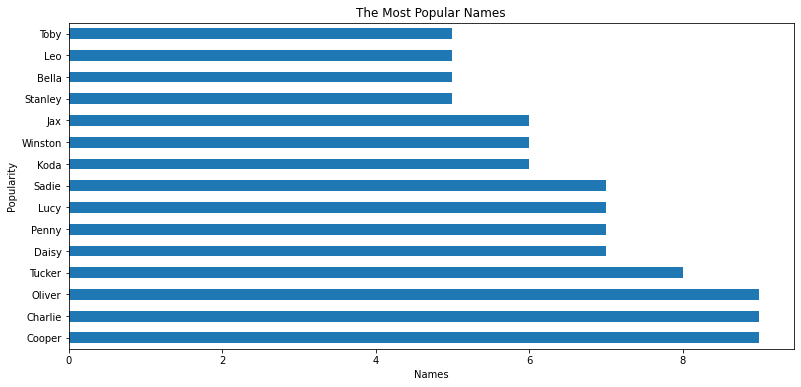

In [89]:
popular_names = df_clean['name'].value_counts()[:15]

plt.figure(figsize=(13,6))
popular_names.plot(kind='barh')
plt.title("The Most Popular Names")
plt.xlabel("Names")
plt.ylabel("Popularity");

As we can see, people like to call their dogs:
- Cooper
- Charlie
- Oliver
- Penny
- Lucy
- Tucker